In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('brokoli.csv')
data

,Yıllar,5 CM TOPRAK SICAKLIKLARI,10 CM TOPRAK SICAKLIKLARI,20 CM TOPRAK SICAKLIKLARI,50 CM TOPRAK SICAKLIKLAR,100 CM TOPRAK SICAKLIKLARI,TOPLAM YAGIS,ORTALAMA SICAKLIK,ORTALAMA NEM,ORTALAMA KAR ORTULU GUNLER SAYISI,ORTALAMA TOPLAM DOLULU GUNLER SAYISI,MINIMUM SICAKLIKLARIN ORTALAMASI,MAKSIMUM SICAKLIKLARIN ORTALAMASI,GUNLUK GUNESLENME SURELERI,URETIM MIKTARI(Ton)
0,2002,15.9,15.8,15.6,15.5,15.5,634.0,13.2,64.2,38.8,0.903,7.7,19.2,7.0,0.34
1,2003,16.0,15.9,15.6,15.5,15.3,664.4,13.2,63.7,31.0,0.639,7.9,19.0,6.8,15.00
2,2004,16.1,16.0,15.8,15.6,15.5,607.4,13.2,62.2,36.0,0.549,7.6,19.2,6.9,20.00
3,2005,16.0,15.9,15.7,15.6,15.5,637.2,13.3,63.2,25.4,0.896,7.9,19.2,6.7,87.70
4,2006,16.2,16.1,15.9,15.7,15.6,607.4,13.3,63.6,31.3,0.903,7.9,19.3,6.8,25.52
5,2007,16.4,16.2,16.0,15.8,15.7,596.7,13.8,61.3,25.9,0.993,8.2,19.8,6.8,47.25
6,2008,16.8,16.2,15.8,15.7,15.7,463.1,13.6,61.0,31.9,0.986,8.0,19.7,6.9,140.03
7,2009,16.9,16.4,15.9,15.7,15.6,793.8,13.7,63.8,19.5,2.069,8.4,19.5,6.5,364.76
8,2010,18.1,17.6,17.1,16.8,16.6,703.0,15.1,62.9,12.7,1.806,9.7,20.1,6.5,215.70
9,2011,16.8,15.8,15.3,15.3,15.5,642.2,12.8,63.1,20.2,1.840,7.6,18.7,6.7,220.28


In [3]:
data.shape

(20, 15)

In [4]:
data.Yıllar= pd.Categorical(data.Yıllar)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Yıllar                                20 non-null     category
 1   5 CM TOPRAK SICAKLIKLARI              20 non-null     float64 
 2   10 CM TOPRAK SICAKLIKLARI             20 non-null     float64 
 3   20 CM TOPRAK SICAKLIKLARI             20 non-null     float64 
 4   50 CM TOPRAK SICAKLIKLAR              20 non-null     float64 
 5   100 CM TOPRAK SICAKLIKLARI            20 non-null     float64 
 6   TOPLAM YAGIS                          20 non-null     float64 
 7   ORTALAMA SICAKLIK                     20 non-null     float64 
 8   ORTALAMA NEM                          20 non-null     float64 
 9   ORTALAMA KAR ORTULU GUNLER SAYISI     20 non-null     float64 
 10  ORTALAMA TOPLAM DOLULU GUNLER SAYISI  20 non-null     float64 
 11  MINIMUM 

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
5 CM TOPRAK SICAKLIKLARI,20.0,16.54500,0.519590,15.900,16.17500,16.450,16.8000,18.100
10 CM TOPRAK SICAKLIKLARI,20.0,16.34500,0.475145,15.800,15.97500,16.300,16.5250,17.600
20 CM TOPRAK SICAKLIKLARI,20.0,16.08500,0.498709,15.300,15.77500,15.900,16.4000,17.100
50 CM TOPRAK SICAKLIKLAR,20.0,15.87500,0.412789,15.300,15.60000,15.750,16.1000,16.800
100 CM TOPRAK SICAKLIKLARI,20.0,15.75500,0.361976,15.200,15.50000,15.700,15.9250,16.600
TOPLAM YAGIS,20.0,619.80500,71.433005,463.100,592.45000,635.600,641.7500,793.800
ORTALAMA SICAKLIK,20.0,13.87000,0.646529,12.800,13.30000,13.800,14.4250,15.100
ORTALAMA NEM,20.0,62.41500,1.303144,59.600,61.45000,62.500,63.4500,64.400
ORTALAMA KAR ORTULU GUNLER SAYISI,20.0,25.64500,9.234060,9.400,19.15000,25.650,31.4500,39.900
ORTALAMA TOPLAM DOLULU GUNLER SAYISI,20.0,1.38505,0.519468,0.549,0.96525,1.514,1.6250,2.686


In [7]:
data_uretım=data["URETIM MIKTARI(Ton)"]

In [8]:
data_uretım

0        0.34
1       15.00
2       20.00
3       87.70
4       25.52
5       47.25
6      140.03
7      364.76
8      215.70
9      220.28
10     188.84
11     198.23
12    1454.81
13     123.00
14     235.60
15     385.95
16     521.70
17     380.16
18     876.15
19    1095.04
Name: URETIM MIKTARI(Ton), dtype: float64

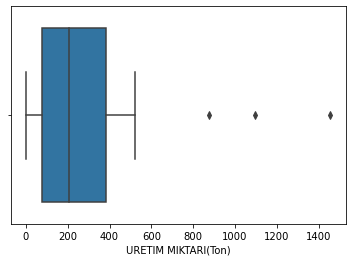

In [9]:
sns.boxplot(x=data_uretım);

In [10]:
Q1=data_uretım.quantile(0.25)
Q3=data_uretım.quantile(0.75)
IQR=Q3-Q1

In [11]:
Q1

77.5875

In [12]:
Q3

381.6075

In [13]:
IQR

304.02

In [14]:
alt_sinir=Q1-1.5*IQR

In [15]:
ust_sinir=Q3+1.5*IQR

In [16]:
alt_sinir

-378.4425

In [17]:
ust_sinir

837.6375

In [18]:
(data_uretım < alt_sinir) | (data_uretım > ust_sinir)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19     True
Name: URETIM MIKTARI(Ton), dtype: bool

In [19]:
aykiri_adgr=(data_uretım < alt_sinir)

In [20]:
data_uretım[aykiri_adgr]

Series([], Name: URETIM MIKTARI(Ton), dtype: float64)

In [21]:
aykiri_udgr=(data_uretım >ust_sinir)

In [22]:
data_uretım[aykiri_udgr]

12    1454.81
18     876.15
19    1095.04
Name: URETIM MIKTARI(Ton), dtype: float64

In [53]:
X=data.drop(["URETIM MIKTARI(Ton)","Yıllar"],axis = 1)
y = data["URETIM MIKTARI(Ton)"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [55]:
X_train.shape

(16, 13)

In [56]:
y_train.shape

(16,)

In [57]:
X_test.shape

(4, 13)

In [58]:
y_test.shape

(4,)

In [59]:
training = data

In [60]:
training.shape

(20, 15)

In [61]:
lm = sm.OLS(y_train, X_train)

In [62]:
model = lm.fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     URETIM MIKTARI(Ton)   R-squared (uncentered):                   0.989
Model:                             OLS   Adj. R-squared (uncentered):              0.942
Method:                  Least Squares   F-statistic:                              20.86
Date:                 Fri, 09 Jun 2023   Prob (F-statistic):                      0.0145
Time:                         15:40:04   Log-Likelihood:                         -87.406
No. Observations:                   16   AIC:                                      200.8
Df Residuals:                        3   BIC:                                      210.9
Df Model:                           13                                                  
Covariance Type:             nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
5 CM TOPRAK SICAKLIKLARI              -589.1905    317.822     -1.854      0.161   -1600.641     422.261
10 CM TOPRAK SICAKLIKLARI              941.5410    547.373      1.720      0.184    -800.444    2683.526
20 CM TOPRAK SICAKLIKLARI            -1457.6692   1032.976     -1.411      0.253   -4745.059    1829.720
50 CM TOPRAK SICAKLIKLAR                56.9210    864.676      0.066      0.952   -2694.863    2808.705
100 CM TOPRAK SICAKLIKLARI             672.7218   1174.280      0.573      0.607   -3064.360    4409.804
TOPLAM YAGIS                            -0.1994      2.025     -0.099      0.928      -6.643       6.245
ORTALAMA SICAKLIK                     -135.7608    745.976     -0.182      0.867   -2509.789    2238.267
ORTALAMA NEM                            -9.4679     97.454     -0.097      0.929    -319.611     300.675
ORTALAMA KAR ORTULU GUNLER SAYISI        7.6282      8.316      0.917      0.427     -18.837      34.093
ORTALAMA TOPLAM DOLULU GUNLER SAYISI   316.5928    250.765      1.263      0.296    -481.454    1114.639
MINIMUM SICAKLIKLARIN ORTALAMASI       478.5037    766.866      0.624      0.577   -1962.005    2919.012
MAKSIMUM SICAKLIKLARIN ORTALAMASI      205.4904    259.787      0.791      0.487    -621.268    1032.249
GUNLUK GUNESLENME SURELERI              70.7138    547.000      0.129      0.905   -1670.085    1811.513
==============================================================================
Omnibus:                        2.633   Durbin-Watson:                   2.659
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.040
Skew:                           0.587   Prob(JB):                        0.595
Kurtosis:                       3.424   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
scaler=preprocessing.MinMaxScaler(feature_range =(0,1))

In [64]:
scaler_df=scaler.fit_transform(data)

In [65]:
scaler_df

array([[0.        , 0.        , 0.        , 0.16666667, 0.13333333,
        0.21428571, 0.51678258, 0.17391304, 0.95833333, 0.96393443,
        0.16565278, 0.04166667, 0.20833333, 1.        , 0.        ],
       [0.05263158, 0.04545455, 0.05555556, 0.16666667, 0.13333333,
        0.07142857, 0.6087088 , 0.17391304, 0.85416667, 0.70819672,
        0.04211511, 0.125     , 0.125     , 0.8       , 0.01007927],
       [0.10526316, 0.09090909, 0.11111111, 0.27777778, 0.2       ,
        0.21428571, 0.43634714, 0.17391304, 0.54166667, 0.87213115,
        0.        , 0.        , 0.20833333, 0.9       , 0.01351695],
       [0.15789474, 0.04545455, 0.05555556, 0.22222222, 0.2       ,
        0.21428571, 0.52645903, 0.2173913 , 0.75      , 0.52459016,
        0.16237716, 0.125     , 0.20833333, 0.7       , 0.06006312],
       [0.21052632, 0.13636364, 0.16666667, 0.33333333, 0.26666667,
        0.28571429, 0.43634714, 0.2173913 , 0.83333333, 0.71803279,
        0.16565278, 0.125     , 0.25      , 

In [66]:
data_st = pd.DataFrame(scaler_df)

In [67]:
data_st

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.000000,0.000000,0.166667,0.133333,0.214286,0.516783,0.173913,0.958333,0.963934,0.165653,0.041667,0.208333,1.0,0.000000
1,0.052632,0.045455,0.055556,0.166667,0.133333,0.071429,0.608709,0.173913,0.854167,0.708197,0.042115,0.125000,0.125000,0.8,0.010079
2,0.105263,0.090909,0.111111,0.277778,0.200000,0.214286,0.436347,0.173913,0.541667,0.872131,0.000000,0.000000,0.208333,0.9,0.013517
3,0.157895,0.045455,0.055556,0.222222,0.200000,0.214286,0.526459,0.217391,0.750000,0.524590,0.162377,0.125000,0.208333,0.7,0.060063
4,0.210526,0.136364,0.166667,0.333333,0.266667,0.285714,0.436347,0.217391,0.833333,0.718033,0.165653,0.125000,0.250000,0.8,0.017312
5,0.263158,0.227273,0.222222,0.388889,0.333333,0.357143,0.403992,0.434783,0.354167,0.540984,0.207768,0.250000,0.458333,0.8,0.032252
6,0.315789,0.409091,0.222222,0.277778,0.266667,0.357143,0.000000,0.347826,0.291667,0.737705,0.204492,0.166667,0.416667,0.9,0.096042
7,0.368421,0.454545,0.333333,0.333333,0.266667,0.285714,1.000000,0.391304,0.875000,0.331148,0.711277,0.333333,0.333333,0.5,0.250552
8,0.421053,1.000000,1.000000,1.000000,1.000000,1.000000,0.725431,1.000000,0.687500,0.108197,0.588208,0.875000,0.583333,0.5,0.148068
9,0.473684,0.409091,0.000000,0.000000,0.000000,0.214286,0.541578,0.000000,0.729167,0.354098,0.604118,0.000000,0.000000,0.7,0.151217


In [77]:
model=linear_model.LinearRegression()

In [82]:
model.fit(X_train , y_train)

LinearRegression()

In [83]:
model.coef_

array([-5.41980534e+02,  8.91521395e+02, -1.05778143e+03, -2.51631734e+02,
        4.98837605e+02, -5.90295845e-01,  1.98819525e+00, -1.55484733e+01,
        5.58732336e+00,  3.16341990e+02,  3.64252904e+02,  1.01703058e+02,
       -1.37029942e+02])

In [84]:
model.intercept_

4406.771833061174

In [85]:
train_predictions = model.predict(X_train)

In [86]:
train_mse = mean_squared_error(y_train, train_predictions)

In [87]:
print("Eğitim veri seti ortalama karesel hata (MSE):", train_mse)

Eğitim veri seti ortalama karesel hata (MSE): 3191.098333704152


In [88]:
test_predictions = model.predict(X_test)

In [89]:
test_mse = mean_squared_error(y_test, test_predictions)

In [90]:
print("Test veri seti ortalama karesel hata (MSE):", test_mse)

Test veri seti ortalama karesel hata (MSE): 7591.138332107568


In [91]:
gelecek_yıllar = pd.DataFrame({
    'Feature1': [value1],
    'Feature2': [value2],
    # ... diğer bağımsız değişkenler
})

NameError: name 'value1' is not defined

In [92]:
prediction = model.predict(new_data)

NameError: name 'new_data' is not defined